Training Accuracy of RandomForestClassifier = 98.04%
Testing Accuracy of RandomForestClassifier = 82.50%


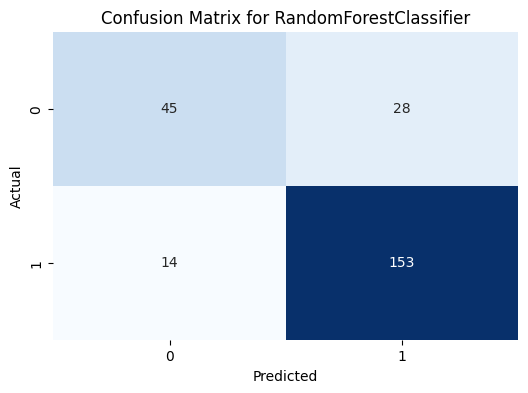

Training Accuracy of KNeighborsClassifier = 78.49%
Testing Accuracy of KNeighborsClassifier = 63.75%


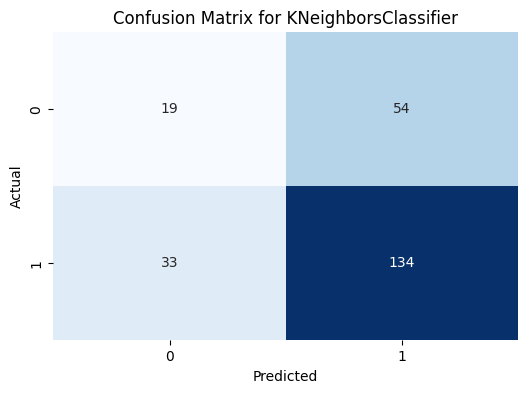

Training Accuracy of SVC = 68.72%
Testing Accuracy of SVC = 69.17%


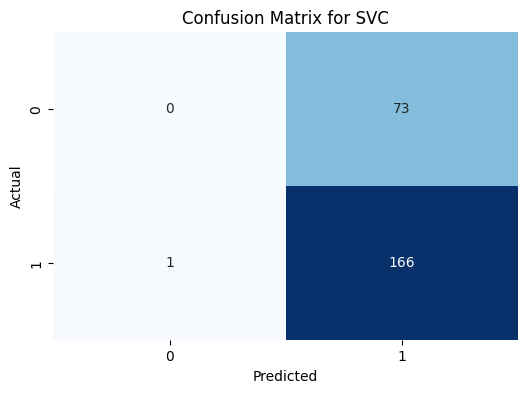

Training Accuracy of LogisticRegression = 80.45%
Testing Accuracy of LogisticRegression = 80.83%


C:\Users\vasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


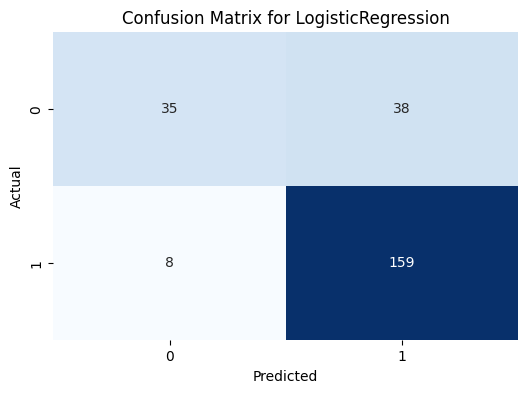

Ensemble Training Accuracy = 86.31%
Ensemble Testing Accuracy = 78.75%


C:\Users\vasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


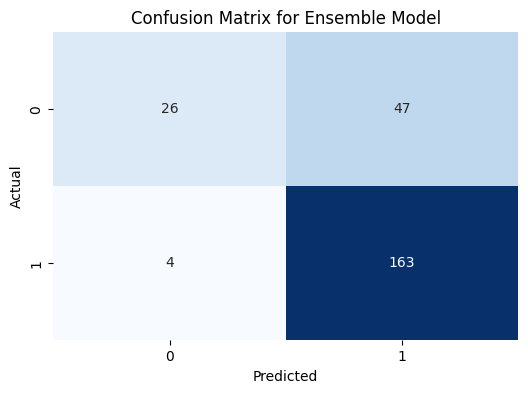

Model saved as 'loan_approval_model.pkl'


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Load data
data = pd.read_csv("loan.csv") 
# Dropping Loan_ID column 
data.drop(['Loan_ID'], axis=1, inplace=True)

# Handle missing values appropriately
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])  # Fill categorical columns with mode
    else:
        data[col] = data[col].fillna(data[col].mean())  # Fill numerical columns with mean

# Encode categorical variables
label_encoder = preprocessing.LabelEncoder() 
for col in data.select_dtypes(include=['object']).columns: 
    data[col] = label_encoder.fit_transform(data[col])

# Split data into train and test sets
X = data.drop(['Loan_Status'], axis=1) 
Y = data['Loan_Status'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7) 
svc = SVC(probability=True)  # Set probability=True for VotingClassifier
lc = LogisticRegression()

# Fit and predict with each model, including confusion matrices
classifiers = [rfc, knn, svc, lc]
for clf in classifiers:
    clf.fit(X_train, Y_train)
    
    # Training accuracy
    Y_train_pred = clf.predict(X_train)
    print(f"Training Accuracy of {clf.__class__.__name__} = {100 * metrics.accuracy_score(Y_train, Y_train_pred):.2f}%")
    
    # Testing accuracy
    Y_test_pred = clf.predict(X_test)
    print(f"Testing Accuracy of {clf.__class__.__name__} = {100 * metrics.accuracy_score(Y_test, Y_test_pred):.2f}%")
    
    # Confusion matrix for the test set
    cm = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {clf.__class__.__name__}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Ensemble learning using VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[
        ('random_forest', rfc), 
        ('knn', knn), 
        ('svc', svc), 
        ('logistic_regression', lc)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted average of probabilities
)

# Fit the ensemble classifier and make predictions
ensemble_clf.fit(X_train, Y_train)

# Ensemble training accuracy
ensemble_train_pred = ensemble_clf.predict(X_train)
print(f"Ensemble Training Accuracy = {100 * metrics.accuracy_score(Y_train, ensemble_train_pred):.2f}%")

# Ensemble testing accuracy
ensemble_test_pred = ensemble_clf.predict(X_test)
print(f"Ensemble Testing Accuracy = {100 * metrics.accuracy_score(Y_test, ensemble_test_pred):.2f}%")

# Confusion matrix for the ensemble model
ensemble_cm = confusion_matrix(Y_test, ensemble_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Ensemble Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Save the model
joblib.dump(ensemble_clf, 'loan_approval_model.pkl')
print("Model saved as 'loan_approval_model.pkl'")
